<a href="https://colab.research.google.com/github/Saurav-Somani/Soft_Computing/blob/main/SNA_Round_2_ICM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random 
import numpy as np

**Creating scale free network**

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random

N = 10000

G = nx.scale_free_graph(N)




def getProbabilityMatrix():
    probability_matrix = [ [ 0 for i in range(N) ] for j in range(N) ]
    for node in G.nodes():
        outedges = G.out_edges(node)
        neighbor = {}
        sum = 0
        for j in outedges:
            if (j[0] != j[1] and probability_matrix[node][j[1]] == 0):
                x = random.random()
                sum = sum + x
                neighbor[j[1]] = x
                probability_matrix[node][j[1]] = -1
        for key in neighbor:
            probability_matrix[node][key] = float(neighbor[key]/sum)
    return probability_matrix

def getRandomSeedSet(k):
    seed_set = list()
    for i in range(k):
        seed_set.append(random.randint(0,N-1))
    return seed_set

def ICM_util(seed_set, probability_matrix):
    queue = []
    res = []
    for i in seed_set:
        queue.append(i)
        res.append(i)
    t = 0
    while queue:
        new_q = []
        while queue:
            x = queue.pop(0)
            for j in G.out_edges(x):
                visited = list()
                if (j[0] != j[1] and not j[1] in visited and not j[1] in res and not j[1] in new_q):
                    visited.append(j[1])
                    p = random.random()
                    if p <= probability_matrix[x][j[1]]:
                        new_q.append(j[1])
        if not new_q:
            break
        queue = new_q
        t = t + 1
        for e in new_q:
            res.append(e)
    print("Activated Nodes - " + str(res))
    print("Number of Steps - " + str(t))
    return t


def ICM(seq):
    seed_set = getRandomSeedSet(random.randint(5,1000))
    probability_matrix = getProbabilityMatrix()
    print("Seed Set " + str(seq+1) + " - " + str(seed_set))
    max_steps = ICM_util(seed_set, probability_matrix)

for i in range(10):
    ICM(i)
    print("\n")

Seed Set 1 - [9176, 2645, 3127, 2750, 7599, 5277, 8695, 8216, 2120, 8552, 7949, 2137, 3577, 5937, 7445, 888, 4537, 3238, 4064, 8722, 8107, 8647, 5726, 1951, 4515, 6489, 122, 1736, 696, 2546, 9277, 5478, 2907, 2923, 3641, 8395, 2076, 923, 9973, 6072, 7792, 6023, 4094, 7099, 4601, 1588, 9642, 9715, 7345, 4930, 9676, 5951, 8443, 1410, 1010, 5622, 4977, 6924, 1868, 6165, 3538, 3644, 517, 879, 4122, 4424, 8873, 2101, 8584, 3957, 211, 4578, 81, 163, 8627, 5912, 2195, 963, 3897, 6066, 6902, 2171, 2853, 1208, 2731, 9079, 8793, 2627, 2174, 5516, 8483, 5158, 9630, 1458, 4494, 2922, 6308, 3935, 3533, 1638, 5911, 4384, 7420, 4540, 160, 6477, 8502, 3179, 3150, 3586, 3586, 8015, 7069, 6769, 475, 2691, 3664, 8659, 1526, 354, 7112, 2367, 1450, 6431, 630, 2735, 1170, 7377, 5381, 4604, 6238, 800, 3642, 4407, 9247, 447, 5873, 6787, 7805, 8126, 5182, 7573, 6486, 8596, 1480, 9765, 2993, 7862, 759, 1203, 5671, 5766, 4151, 2361, 6274, 4182, 8930, 611, 996, 6887, 9302, 9683, 5261, 8136, 2193, 3190, 7530, 7002

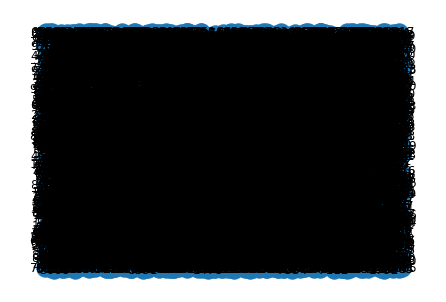

In [ ]:
nx.draw_random(G, with_labels = True)
plt.savefig("fig1.png")